Praktikum Klasifikasi dengan KNN

In [2]:
import pandas as pd
import numpy as np
colnames =['preg','plas','pres','skin','test', 'mass', 'pedi','age','class']
df=pd.read_csv('../resource/diabetes.csv',names=colnames)

In [3]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,627.000,50,3
1,1,85,66,29,0,26.6,351.000,31,0
2,8,183,64,0,0,23.3,672.000,32,1
3,1,89,66,23,94,28.1,167.000,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate,cross_val_score
model=KNeighborsClassifier(n_neighbors=43, weights='distance')
X=df.drop('class',axis=1)
y=df['class']
cv_score1=cross_validate(model,X,y,cv=5, return_train_score=True)
cv_score2=cross_val_score(model,X,y,cv=10)

/home/jackshaw/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/home/jackshaw/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [5]:
print (cv_score1['train_score'].mean(), cv_score1['test_score'].mean())

1.0 0.6653425006366183


In [6]:
print(cv_score2.mean()) #test_score

0.6731373889268626


In [7]:
def knn_predict(k) :
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_validate(model,X,y,cv=10, return_train_score=True)
    train_score = score['train_score'].mean()
    test_score = score['test_score'].mean()
    return train_score, test_score

In [8]:
#Tuning Hyperparameter KNN manual
train_scores=[]
test_scores=[]
for k in range (2,100):
    train_score, test_score=knn_predict(k)
    train_scores.append(train_score)
    test_scores.append(test_score)

/home/jackshaw/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/home/jackshaw/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/home/jackshaw/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/home/jackshaw/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/home/jacksh

<function matplotlib.pyplot.show(close=None, block=None)>

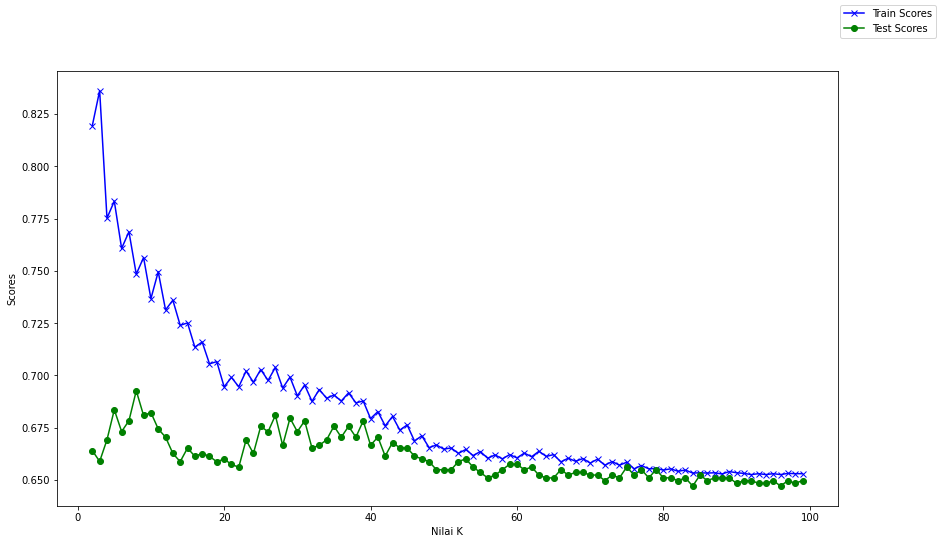

In [9]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(14,8))
ax.plot(range(2,100),train_scores, marker='x', color='b', label='Train Scores')
ax.plot(range(2,100),test_scores, marker='o', color='g', label='Test Scores')
ax.set_xlabel('Nilai K')
ax.set_ylabel('Scores')
fig.legend()
plt.show


In [10]:
#Tuning Hyperparameter KNN otomatis dengan GridSearchCV 
from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier()
param_grid={'n_neighbors':np.arange(5,50),'weights':['distance','uniform']}
gscv=GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=5)
gscv.fit(X,y)
print(gscv)
print(gscv.best_params_,gscv.best_score_)

/home/jackshaw/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['distance', 'uniform']},
             scoring='accuracy')
{'n_neighbors': 5, 'weights': 'distance'} 0.6913929208046856


In [11]:
#Tuning Hyperparameter KNN otomatis dengan RandomGridSearchCV , default iter =10
from sklearn.model_selection import RandomizedSearchCV
model = KNeighborsClassifier()
param_grid={'n_neighbors':np.arange(5,50),'weights':['distance','uniform']}
rscv=RandomizedSearchCV(model, param_grid,n_iter=15, scoring='accuracy', cv=5)
rscv.fit(X,y)
print(rscv.best_params_, rscv.best_score_)

/home/jackshaw/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


{'weights': 'uniform', 'n_neighbors': 11} 0.6861471861471861
